In [27]:
#训练模型
import numpy as np
import pandas as pd
from autogluon.tabular import TabularDataset, TabularPredictor
from matplotlib import pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

data_path= "automl_train_data.csv"
df=pd.read_csv(data_path) # path to colab notebook #replace this with the path to your dataset
df_nine_color=df.loc[:,['subclass','rmag-imag','imag-zmag','zmag-Jmag','Jmag-Hmag','Hmag-Kmag','Kmag-W1mag','W1mag-W2mag','W2mag-W3mag']]
df_nine_color.head()

,subclass,rmag-imag,imag-zmag,zmag-Jmag,Jmag-Hmag,Hmag-Kmag,Kmag-W1mag,W1mag-W2mag,W2mag-W3mag
0,M0,-3.785,-1.213,6.747,0.870,0.333,0.839,0.343,1.143
1,M7,2.336,1.249,1.766,0.611,0.338,0.208,0.191,0.366
2,M6,2.295,1.261,1.677,0.608,0.559,-0.268,0.306,3.515
3,M7,2.183,1.204,1.709,0.534,0.466,0.109,0.219,0.589
4,M8,2.687,1.437,1.839,0.630,0.450,0.137,0.223,1.632


In [28]:
#bd_data = TabularDataset(data_path)
df_train,df_test=train_test_split(df_nine_color,test_size=0.2,random_state=1)
#test_data = TabularDataset('https://autogluon.s3.amazonaws.com/datasets/Inc/test.csv')
save_path = './nine_color/'
predictor = TabularPredictor(label='subclass',path=save_path).fit(train_data=df_train)
#num_stack_levels=1,num_bag_folds=5
#predictions = predictor.predict(test_data)

Beginning AutoGluon training ...
AutoGluon will save models to "./nine_color/\"
AutoGluon Version:  0.4.0
Python Version:     3.9.11
Operating System:   Windows
Train Data Rows:    11332
Train Data Columns: 8
Label Column: subclass
Preprocessing data ...
AutoGluon infers your prediction problem is: 'multiclass' (because dtype of label-column == object).
	First 10 (of 22) unique label values:  ['M7', 'M6', 'M8', 'M4', 'M5', 'M3', 'L', 'M9', 'K0', 'M1']
	If 'multiclass' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Fraction of data from classes with at least 10 examples that will be kept for training models: 0.996381927285563
Train Data Class Count: 11
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    6414.82 MB
	Train Data (Original)  Memory Usage: 0.72 MB (0.0% of av

In [29]:
#验证集
y_pred = predictor.predict(df_test)
y_true= df_test['subclass']
xstick=y_true.drop_duplicates()
predictor.evaluate_predictions(y_true, y_pred)

Evaluation: accuracy on test data: 0.7346506704304869
Evaluations on test data:
{
    "accuracy": 0.7346506704304869,
    "balanced_accuracy": 0.3288516275691958,
    "mcc": 0.6625299839495589
}


{'accuracy': 0.7346506704304869,
 'balanced_accuracy': 0.3288516275691958,
 'mcc': 0.6625299839495589}

[[  0   0   0   0   0   0   0   0   2   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0
    0]
 [  0   0   0   0   0   0   0   0   2   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   0   0   0   0   2   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   0   0   0   0   2   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   0   0   0  12   0   0   0   0   0   0   0   0   1   1
    0]
 [  0   0   0   0   0   0   0   0  12   0   0   2   1   0   0   0   0   0
    0]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0
    0]
 [  0   0   0   0   0   0   0   0   0   0   0   1   1   0   0   0   0   0
    0]
 [  0   0   0   0   0   0   0   0   0   0   0  24  29   1   1   0   0   0
    0]
 [  0   0   0   0   0   0   

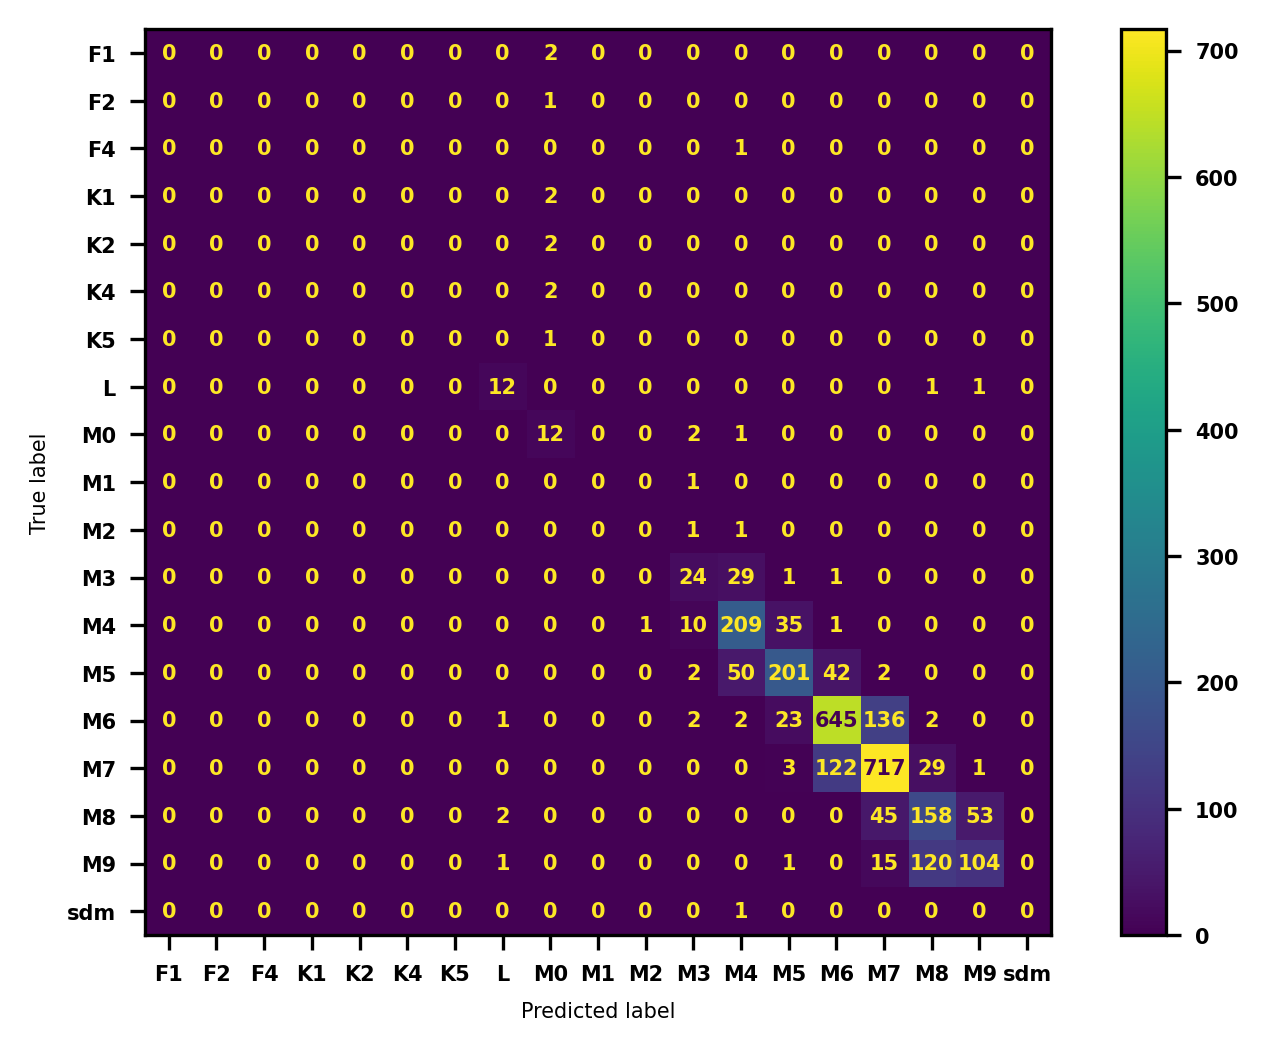

In [30]:
#混淆矩阵
from sklearn.metrics import confusion_matrix
font = {'family' : 'normal',
    'weight' : 'bold',
    'size'   : 5}
plt.rc('font', **font)
plt.rcParams['savefig.dpi'] = 300  # 图片像素
plt.rcParams['figure.dpi'] = 300  # 分辨率
cm=confusion_matrix(y_true,y_pred)
print(cm)
ConfusionMatrixDisplay.from_predictions(y_true, y_pred)

[[0.         0.         0.         0.         0.         0.
  0.         0.         1.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         1.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  1.         0.         0.         0.         0.         0.
  0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         1.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         1.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.        ]
 [0.         0.         0.    

<AxesSubplot:>

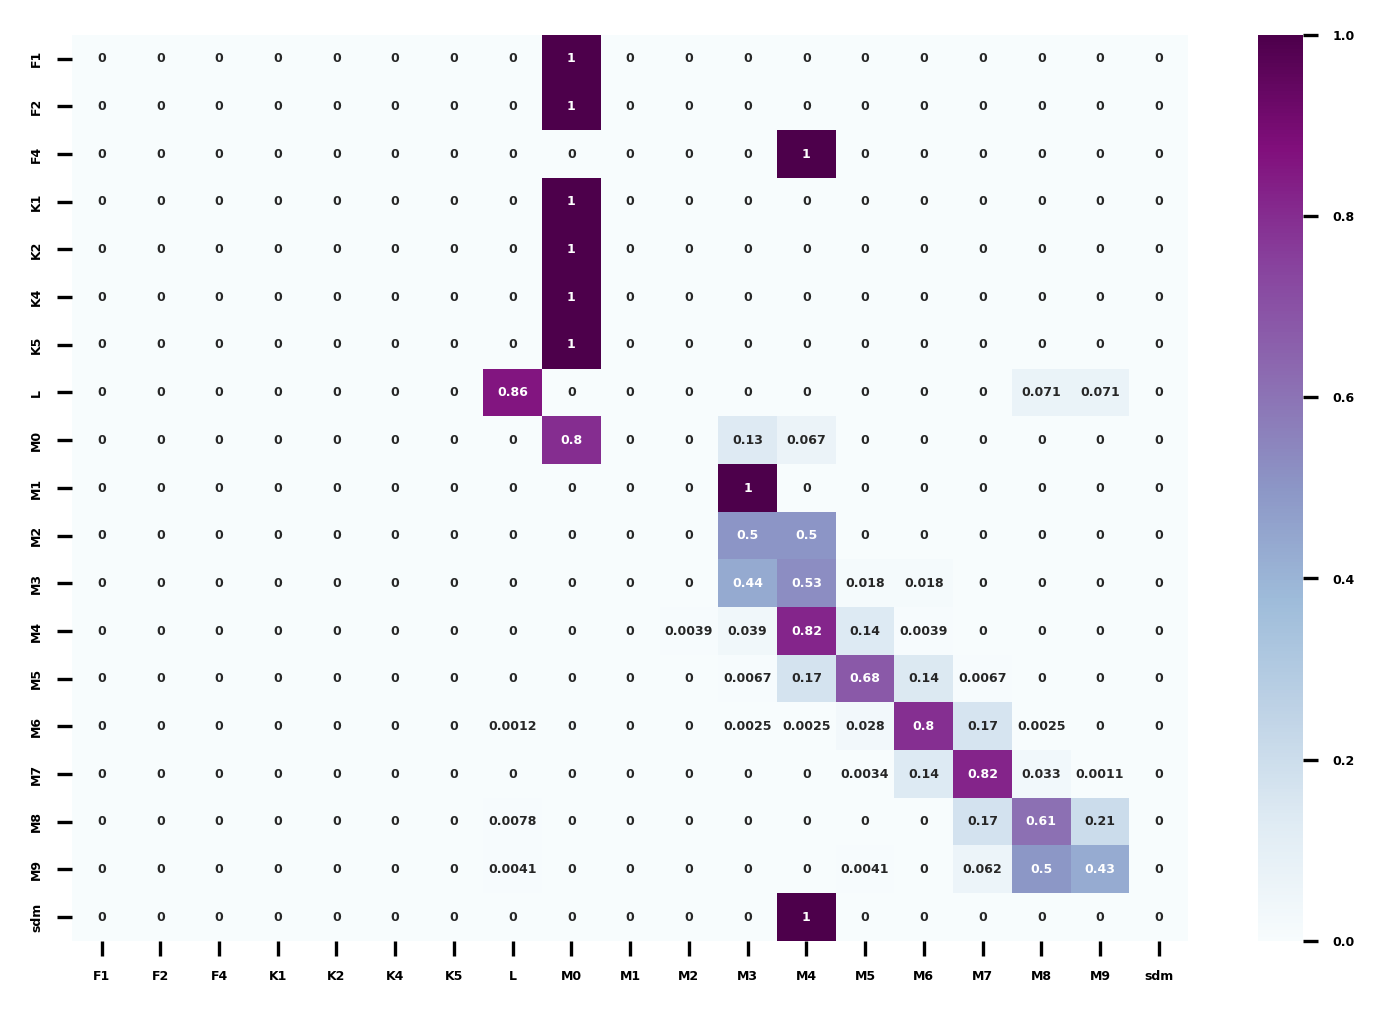

In [31]:
#混淆矩阵percentage
import seaborn as sn
cmpercent=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
print(cmpercent)
tick=xstick.sort_values()
font = {'family' : 'normal',
    'weight' : 'bold',
    'size'   : 3}
plt.rc('font', **font)
sn.heatmap(cmpercent,xticklabels=tick,yticklabels=tick, annot=True, cmap="BuPu")

In [32]:
#可解释性
predictor.feature_importance(df_test)

Computing feature importance via permutation shuffling for 8 features using 1000 rows with 3 shuffle sets...
	38.74s	= Expected runtime (12.91s per shuffle set)
	10.39s	= Actual runtime (Completed 3 of 3 shuffle sets)


,importance,stddev,p_value,n,p99_high,p99_low
imag-zmag,0.309333,0.022301,0.000864,3,0.437120,0.181546
rmag-imag,0.213000,0.016703,0.001022,3,0.308712,0.117288
zmag-Jmag,0.032000,0.006557,0.006855,3,0.069575,-0.005575
Jmag-Hmag,0.013667,0.004041,0.013967,3,0.036825,-0.009491
Hmag-Kmag,0.008667,0.014364,0.202852,3,0.090976,-0.073642
W2mag-W3mag,0.008667,0.009074,0.119942,3,0.060660,-0.043327
W1mag-W2mag,0.005667,0.007572,0.162155,3,0.049054,-0.037721
Kmag-W1mag,0.004000,0.007937,0.237387,3,0.049481,-0.041481


In [33]:
#各个模型的性能
predictor.leaderboard(df_test, silent=True)

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,0.734651,0.753982,1.724951,0.412977,56.057811,0.018675,0.000947,0.563639,2,True,14
1,LightGBM,0.730064,0.743363,0.058773,0.017520,3.767200,0.058773,0.017520,3.767200,1,True,5
2,ExtraTreesGini,0.730064,0.725664,0.553101,0.106027,0.971322,0.553101,0.106027,0.971322,1,True,9
3,RandomForestEntr,0.729005,0.733628,0.275120,0.121017,2.480631,0.275120,0.121017,2.480631,1,True,7
4,XGBoost,0.726182,0.748673,0.101421,0.011290,7.862616,0.101421,0.011290,7.862616,1,True,11
5,RandomForestGini,0.725829,0.731858,0.350344,0.120935,1.626771,0.350344,0.120935,1.626771,1,True,6
6,ExtraTreesEntr,0.725829,0.732743,0.489603,0.105004,1.056770,0.489603,0.105004,1.056770,1,True,10
7,LightGBMXT,0.724065,0.733628,0.230966,0.055963,5.288834,0.230966,0.055963,5.288834,1,True,4
8,CatBoost,0.723359,0.737168,0.016000,0.003999,12.609578,0.016000,0.003999,12.609578,1,True,8
9,LightGBMLarge,0.717713,0.741593,1.100197,0.216130,18.113050,1.100197,0.216130,18.113050,1,True,13


In [36]:
#gaia数据集
LSdssWiseGaia=pd.read_csv(r'E:\学习资料\天文\作业五\20211123_150w_match_simbad\LTY\LSdssWiseGaia_extinc_45.csv')
L_color= LSdssWiseGaia.loc[:,['subclass','rmag-imag','imag-zmag','zmag-Jmag','Jmag-Hmag','Hmag-Kmag','Kmag-W1mag','W1mag-W2mag','W2mag-W3mag']]
L_color.head()
L_color_predict=predictor.predict(L_color)
L_color_predict

0      M3
1       L
2      M9
3       L
4      M9
       ..
432     L
433     L
434    M8
435    M8
436    M8
Name: subclass, Length: 437, dtype: object